# Lorenz equations

The following system of ordinary differential equations is called the Lorenz system:

\begin{equation}
  \begin{aligned}
    \frac{dx}{dt} &= \sigma (y - x) \\
    \frac{dy}{dt} &= x (\rho - z) - y \\
    \frac{dz}{dt} &= x y - \beta z
  \end{aligned}
\end{equation}

It was developed in 1963 by Edward Lorenz as simplified mathematical model for atmospheric convection. It is notable for having chaotic solutions for certain parameter values and initial conditions. Typical paramters in the chaotic regime are $\rho=28$, $\sigma=10$, $\beta=8/3$.


In [1]:
# Import 
import jax.numpy as np
from jax.experimental.ode import odeint
from jax import grad
from jax import jit
from jax import random
from jax import value_and_grad

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

## 1. The role of the parameters and the initial conditions

We fix the value of $\sigma=10$ and $\beta=8/3$ and observe the effect of different $\rho$'s.

In [2]:
# Define the Lorenz system as a function of (x, y, z), t and rho
def lorenz(y_full, t, rho):
    x,y,z= y_full
    sigma = 10
    beta = 8/3
    
    dydt = np.array([sigma*(y-x), x*(rho-z)-y, x*y - beta*z])
    return dydt

y0 = np.array((5.0, 5.0, 5.0)) # Initial condition
t = np.linspace(0., 10., 5001) # Time from 0 to 50

# Start with rho=5
rho = 5.

We now generate a trajectory by integrating our Lorenz equations with the parameters and initial conditions we just fixed.

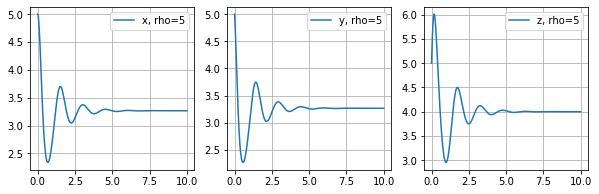

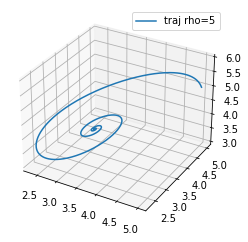

In [3]:
# Generate a trjectory
traj_rho5 = odeint(lorenz, y0, t, rho)

# Plot the single components
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i, variable in enumerate(['x', 'y', 'z']):
    ax[i].plot(t, traj_rho5[:, i], label=f'{variable}, rho=5')
    ax[i].grid()
    ax[i].legend()
plt.show()

# Plot the 3d trajectory
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot(traj_rho5[:,0], traj_rho5[:,1], traj_rho5[:,2], label="traj rho=5")
ax.legend()
plt.show()

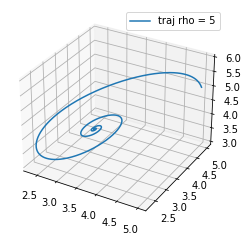

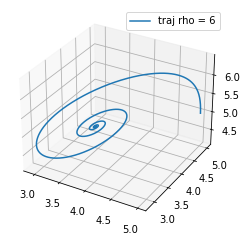

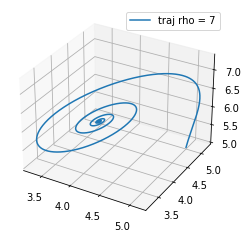

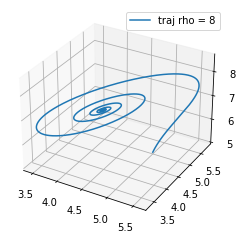

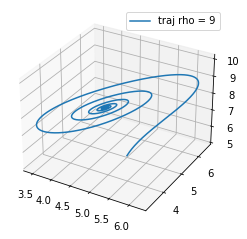

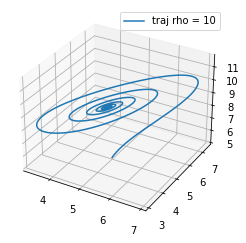

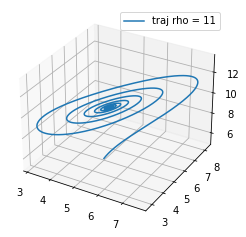

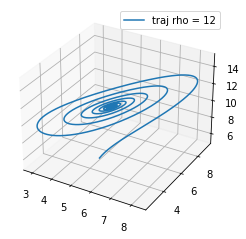

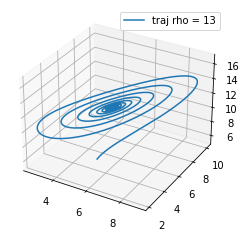

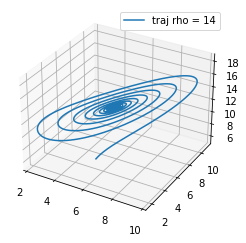

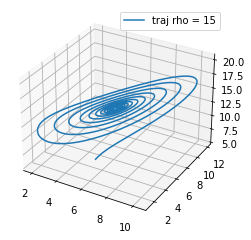

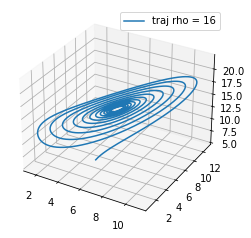

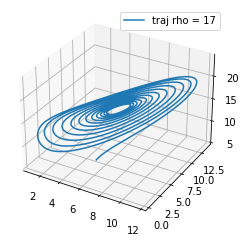

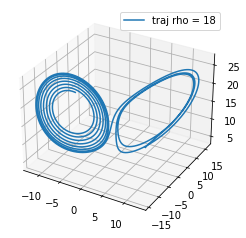

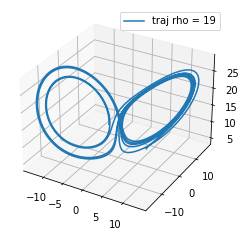

In [4]:
for rho in range(5,20):
    traj_rho5 = odeint(lorenz, y0, t, rho)
    ax = plt.axes(projection='3d')
    ax.plot(traj_rho5[:,0], traj_rho5[:,1], traj_rho5[:,2], label=f"traj rho = {rho}")
    ax.legend()
    plt.show()

### (a) For this set of parameters, the solution converges to a stable fixed point. What happens when we change the initial conditions?

~ *Your answer here* ~
**While changes the initial conditions, the trajectories change but they still converge towards a similar point of around [3,3,4]. Depending on how large or how different, you can get more loops or greater changes across each of the axes.**

Now try to increase the value of $\rho$. You'll soon hit a value $\rho^*$ beyond which the solution becomes chaotic.

### (b) Give an estimate of $\rho^*$ 
**It looks like the solution starts to be chaotic around rho equal to 18.**

### (c) What happens when we change the initial conditions for a system with $\rho>\rho^*$?

~ *Your answers here* ~
**You can see that the by changing the initial conditions with this chosen value of rho greater than 18 that the trajectory will not always be chaotic. It seems that different combinations or values for the initial condition that are less than the starting condition [5,5,5] will not be chaotic. With a high rho and higher initial conditions, the system will be chaotic. This shows us that the initial conditions can affect if a solution becomes chaotic or not.** 

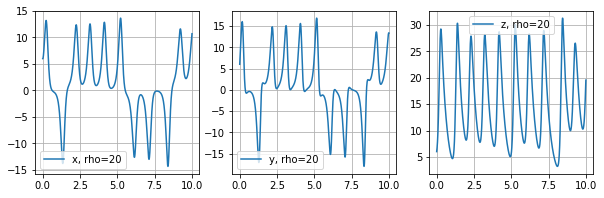

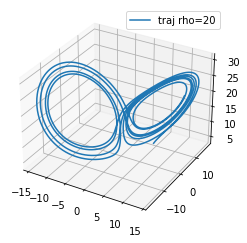

Converged Point [10.703154 13.347636 19.554255]


In [5]:
# Your code here #
y0 = np.array((6.0, 6.0, 6.0)) # Initial condition
t = np.linspace(0., 10., 5001) # Time from 0 to 50

# Start with rho=5
rho = 20

# Generate a trjectory
traj_rho = odeint(lorenz, y0, t, rho)

# Plot the single components
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i, variable in enumerate(['x', 'y', 'z']):
    ax[i].plot(t, traj_rho[:, i], label=f'{variable}, rho={rho}')
    ax[i].grid()
    ax[i].legend()
plt.show()

# Plot the 3d trajectory
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot(traj_rho[:,0], traj_rho[:,1], traj_rho[:,2], label=f"traj rho={rho}")
ax.legend()
plt.show()


print("Converged Point", traj_rho[-1,:])

## 2. Predict the parameters of the equations

We now give you two trajectories that have been generated for different parameters. In both cases we fix $\beta=8/3$.

### (a) Determine the value of $\rho$ and of the initial condition $(x_0,y_0,z_0)$ of the trajectory found in "Lorenz\_traj1.txt", where $\sigma = 10$.

[ Hint 1: for the initial guesses of $\rho$, remember what we learned with about the solution for different values of $\rho$ (above and below $\rho^*$) ]

[ Hint 2: for the initial guesses of $(x_0,y_0,z_0)$, look at your data! ]

## ~ *Your answer here* ~ 
### Rho = 19
### Initial condition is (13, -6, 17)

In [6]:
import pandas as pd
data_pd = pd.read_csv("Lorenz_traj1.txt", sep = " ", header = None)
data_array = data_pd.to_numpy()
traj_true = data_array[:,1:]

print("Initial coordinates: ", traj_true[0,:])

Initial coordinates:  [13. -6. 17.]


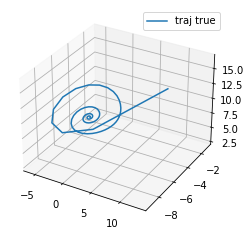

In [7]:
# Plot the 3d trajectory
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot(traj_true[:,0], traj_true[:,1], traj_true[:,2], label=f"traj true")
ax.legend()
plt.show()

In [8]:
# Define the Lorenz system as a function of (x, y, z), t and rho
def lorenz(y_full, t, rho):
    x,y,z = y_full
    sigma = 10
    beta = 8/3
    dydt = np.array([sigma*(y-x), x*(rho-z)-y, x*y - beta*z])
    return dydt

t = np.linspace(0., 10., 5001) # Time from 0 to 10
y0_guess = traj_true[0,:]
rho_guess = 4.4

# Generate a trjectory
traj_rho = odeint(lorenz, y0_guess, t, rho_guess)

def residual(rho):
    return np.sum((odeint(lorenz,y0, t, rho).reshape(-1) - traj_rho.reshape(-1))**2)

In [9]:
rho_grad = jit(grad(residual,0))
lr_rho = 0.0002
count = 0
print("Starting guess", rho_guess)
while np.abs(rho_grad(rho_guess)) > 0.01:
    rho_guess -= lr_rho * rho_grad(rho_guess)
    count +=1
    
    if count % 100 == 0:
        print("Amount of iterations",count)
        print("Guess of rho now", np.abs(rho_guess))
    
    if count > 999:
        break
print()
print(f"Converged Rho: {np.abs(rho_guess)} after {count} iterations")

Starting guess 4.4
Amount of iterations 100
Guess of rho now 12.975537
Amount of iterations 200
Guess of rho now 15.705131
Amount of iterations 300
Guess of rho now 17.219967
Amount of iterations 400
Guess of rho now 18.153019
Amount of iterations 500
Guess of rho now 18.75957
Amount of iterations 600
Guess of rho now 19.16653
Amount of iterations 700
Guess of rho now 19.44506
Amount of iterations 800
Guess of rho now 19.638178
Amount of iterations 900
Guess of rho now 19.773247
Amount of iterations 1000
Guess of rho now 19.868288

Converged Rho: 19.868288040161133 after 1000 iterations


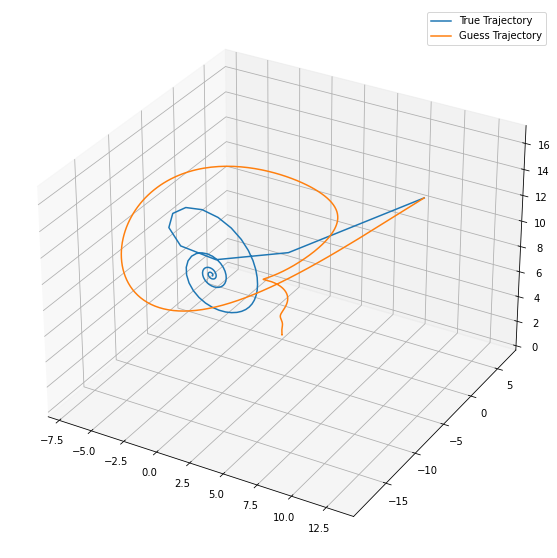

In [10]:
from mpl_toolkits import mplot3d
traj_rho = odeint(lorenz, y0_guess, t, rho_guess)
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot(traj_true[:,0], traj_true[:,1], traj_true[:,2], label=f"True Trajectory")
ax.plot(traj_rho[:,0], traj_rho[:,1], traj_rho[:,2], label=f"Guess Trajectory")
ax.legend()
plt.show()

In [11]:
print(f"Found I.C {y0_guess} and rho {np.abs(rho_guess)}")

Found I.C [13. -6. 17.] and rho 19.868288040161133


### (b) Determine the values of $\rho$ and $\sigma$ for the trajectory found in "Lorenz\_traj2.txt", where the initial condition is $(x_0,y_0,z_0) = (5,5,5)$ 

[ Hint: start with low values ]

~ *Your answer here* ~

In [12]:
data_pd = pd.read_csv("Lorenz_traj2.txt", sep = " ", header = None)
data_array = data_pd.to_numpy()
traj_true2 = data_array[:,1:]

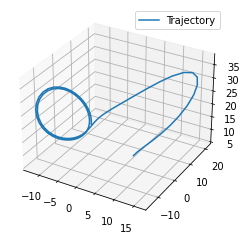

In [13]:
# Plot the 3d trajectory
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot(traj_true2[:,0], traj_true2[:,1], traj_true2[:,2], label=f"Trajectory")
ax.legend()
plt.show()

In [14]:
# Using Lecture 5 code

## Lorenz Equations
from jax.experimental.ode import odeint
import matplotlib.pyplot as plt

'''
dx/dt = sigma(y-x)
dy/dt = x(rho - z) - y
dz/dt = xy - beta z
sigma=10, beta = 8/3, rho=28 typical parameters
'''

def lorenz(y_full, t, rho,sigma):
    x,y,z= y_full
    beta=8/3.
    dydt = np.array([sigma*(y-x), x*(rho-z)-y, x*y - beta*z])
    return dydt


# Set I.C
y0 = np.array((5.0, 5.0,5.0)) # I.C.
t = np.linspace(0., 5., 101) # Time from 0 to 5

# Trying to solve for rho and sigma

rho_guess = 19.0 #best = 19
sigma_guess = 15.0 # best = 15


In [15]:
def residual(rho, sigma):
    return np.sum((odeint(lorenz,y0, t, rho, sigma).reshape(-1) - traj_true2.reshape(-1))**2)

grad_rho = jit(grad(residual, 0))
grad_sigma = jit(grad(residual, 1))

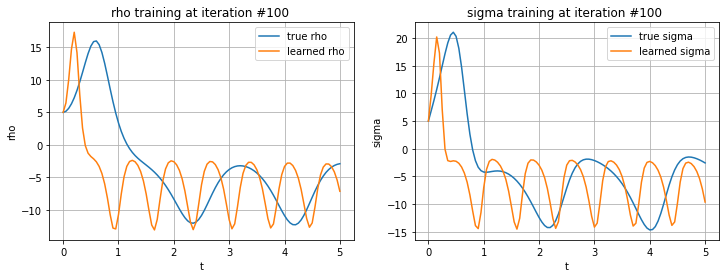

Guessed rho: 23.962703704833984 & sigma: 16.153499603271484
Rho loss 40.59305953979492, Sigma loss 161.06329345703125


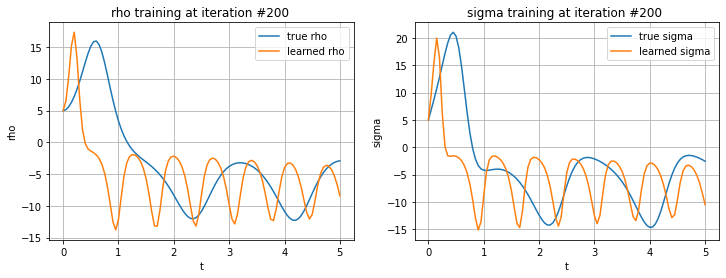

Guessed rho: 23.626314163208008 & sigma: 18.40855598449707
Rho loss 5.164527416229248, Sigma loss 72.3675537109375


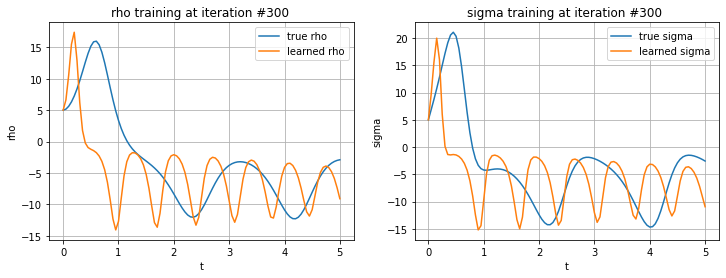

Guessed rho: 23.582632064819336 & sigma: 19.425174713134766
Rho loss 0.44602182507514954, Sigma loss 34.369693756103516


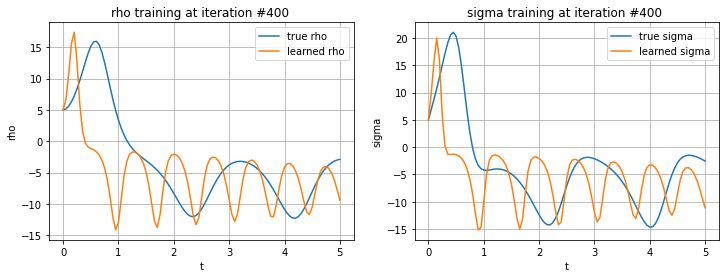

Guessed rho: 23.578874588012695 & sigma: 19.925678253173828
Rho loss 0.15847787261009216, Sigma loss 17.61963653564453


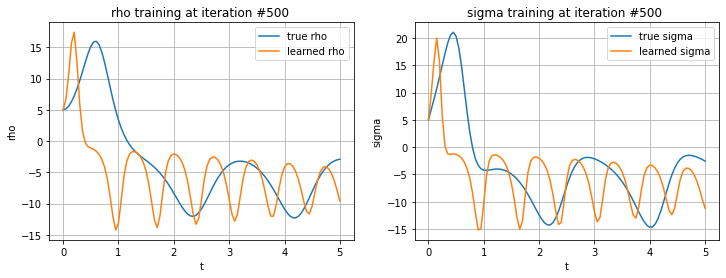

Guessed rho: 23.581485748291016 & sigma: 20.18685531616211
Rho loss 0.1591489613056183, Sigma loss 9.351933479309082


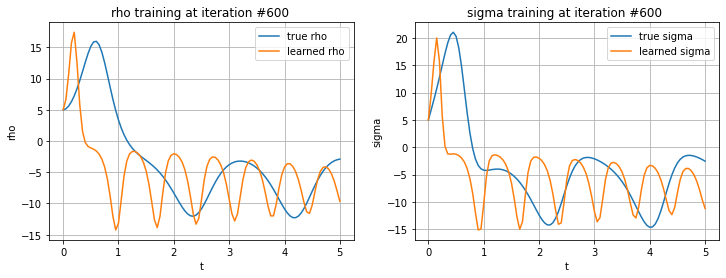

Guessed rho: 23.584083557128906 & sigma: 20.327373504638672
Rho loss 0.12376285344362259, Sigma loss 5.081617832183838


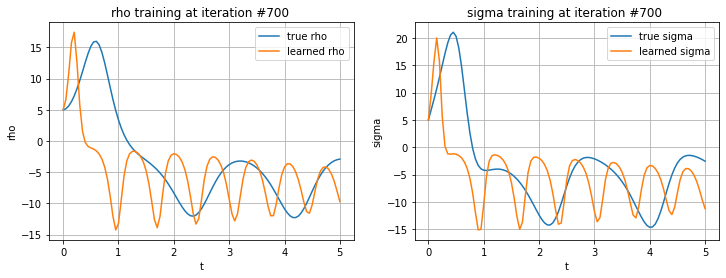

Guessed rho: 23.58586311340332 & sigma: 20.404191970825195
Rho loss 0.023361094295978546, Sigma loss 2.8135666847229004


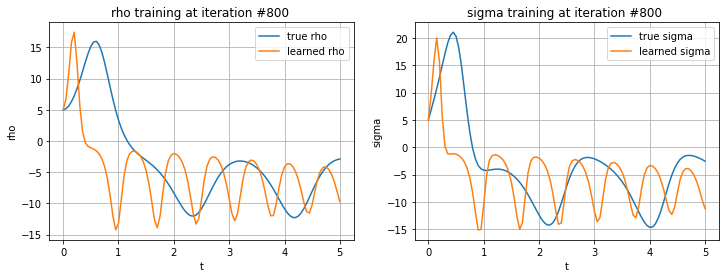

Guessed rho: 23.586902618408203 & sigma: 20.446496963500977
Rho loss 0.27456483244895935, Sigma loss 1.527078628540039


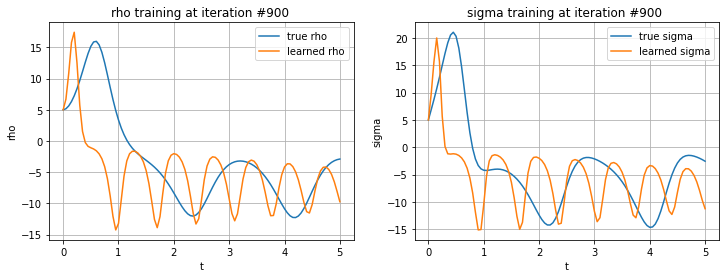

Guessed rho: 23.587600708007812 & sigma: 20.46999168395996
Rho loss 0.057072173804044724, Sigma loss 0.8437344431877136

Final: 
Converged rho: 23.587810516357422 & sigma: 20.47629165649414


In [16]:
learning_rate = 0.0002
epoch = 0  # 


# doing gradient descent
while np.abs(grad_rho(rho_guess,sigma_guess)) > 1e-3 and np.abs(grad_sigma(rho_guess,sigma_guess))> 1e-3:
    rho_guess -= learning_rate * grad_rho(rho_guess,sigma_guess)
    sigma_guess -= learning_rate * grad_sigma(rho_guess,sigma_guess)
    
    epoch +=1
    # check how learned ODE fares aginst the real trajectory
    if (epoch+1) % 100 == 0:
        cur_traj = odeint(lorenz, y0, t, rho_guess, sigma_guess)
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        for i, variable in enumerate(['rho', 'sigma']):
            ax[i].plot(t, traj_true2[:, i], label=f'true {variable}')
            ax[i].plot(t, cur_traj[:, i], label=f'learned {variable}')
            ax[i].set_xlabel('t')
            ax[i].set_ylabel(f'{variable}')
            ax[i].set_title(f'{variable} training at iteration #{epoch+1} ')
            ax[i].grid()
            ax[i].legend()
        plt.show()
        print(f"Guessed rho: {np.abs(rho_guess)} & sigma: {np.abs(sigma_guess)}")
        print(f"Rho loss {np.abs(grad_rho(rho_guess,sigma_guess))}, Sigma loss {np.abs(grad_sigma(rho_guess,sigma_guess))}")
        
    if epoch > 1000:
        break
        
print()
print("Final: ")
print(f"Converged rho: {np.abs(rho_guess)} & sigma: {np.abs(sigma_guess)}")      

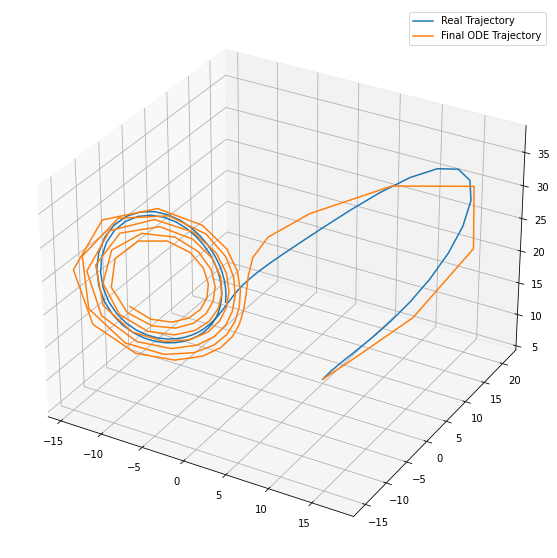

In [17]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(traj_true2[:,0], traj_true2[:,1], traj_true2[:,2], label=f"Real Trajectory")
ax.plot(cur_traj[:,0], cur_traj[:,1], cur_traj[:,2], label=f"Final ODE Trajectory")
ax.legend()
plt.show()

## When Running for 0 < t < 30
It will not run. The chaos in the odes become more chaotic over larger periods of time. We saw this in Lecture 5 collab and this is why when running from 0 to 30 will not work.
